## The Sparks Foundation Data Science and Business Analytics Internship

## TASK 6 : Prediction using Decision Tree Algorithm

## Author: Prabhat Shukla

1)For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
2)The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## STEP 1: Importing the dataset

In [3]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the iris dataset 
iris = load_iris()

#splitting the feature variable and target variable 
X=iris.data[:,:]
y=iris.target

In [5]:
#creating dataframe
df=pd.DataFrame(iris['data'],columns=['Petal Length','Petal Width','Sepal Length','Sepal Width'])
df

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x:iris['target_names'][x])

In [7]:
#display the first 5 rows in iris dataset 
df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#displaying the last 5 rows in iris dataset 
df.tail()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df.sample(7)

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
90,5.5,2.6,4.4,1.2,versicolor
116,6.5,3.0,5.5,1.8,virginica
88,5.6,3.0,4.1,1.3,versicolor
122,7.7,2.8,6.7,2.0,virginica
10,5.4,3.7,1.5,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa
100,6.3,3.3,6.0,2.5,virginica


In [10]:
#find the number of rows and columns
df.shape

(150, 5)

In [11]:
#to find the more information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal Length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#to get the statistical information about the dataset 
df.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#displaying the column names
df.columns

Index(['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'Species'],
      dtype='object')

In [14]:
#to check any null values and missing values 
df.isnull().sum()

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [15]:
#to check any duplicate values
df.duplicated().sum()

1

In [16]:
data = df.drop_duplicates(subset ="Species",)
data

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [17]:
df.value_counts("Species")

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

As we saw that each classes (Species) has equal number of data points, So our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

## STEP 2: Visualizing the Dataset

<Figure size 2500x2500 with 0 Axes>

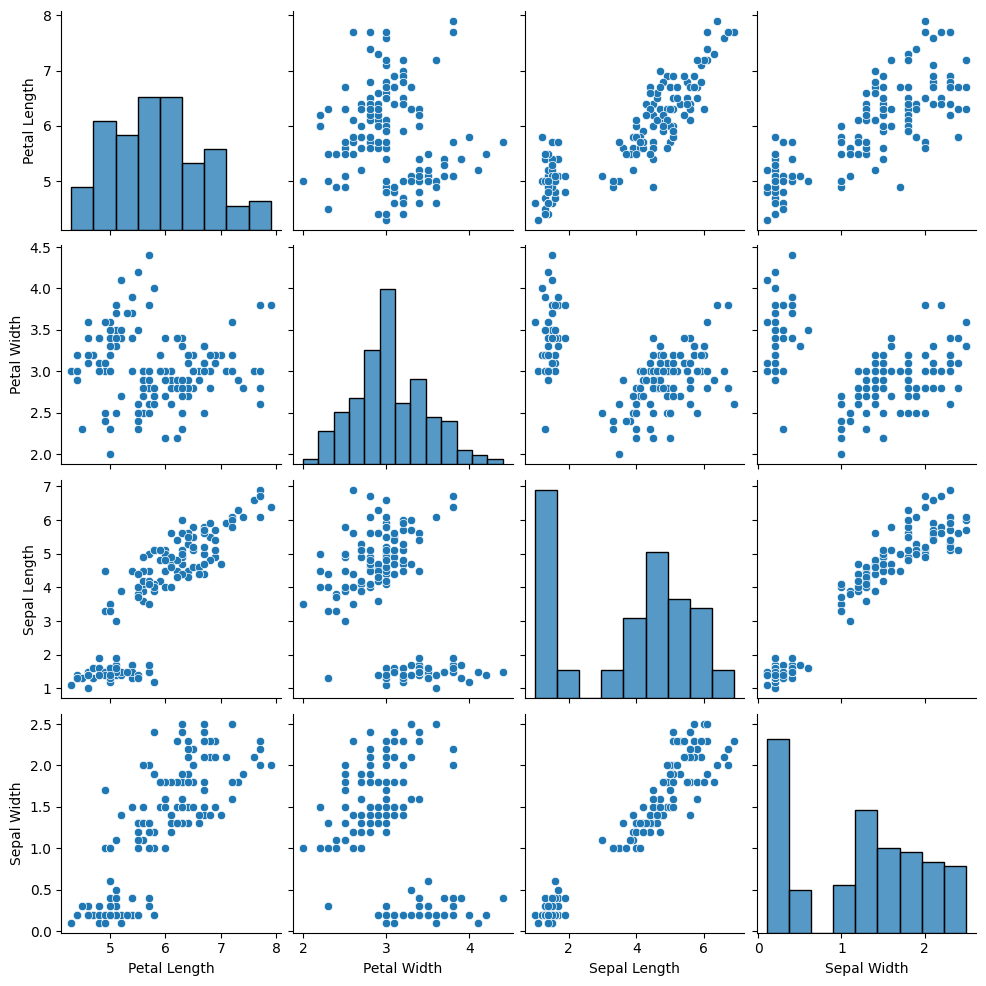

In [18]:
#visualizing the dataset 
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

<Figure size 2500x2500 with 0 Axes>

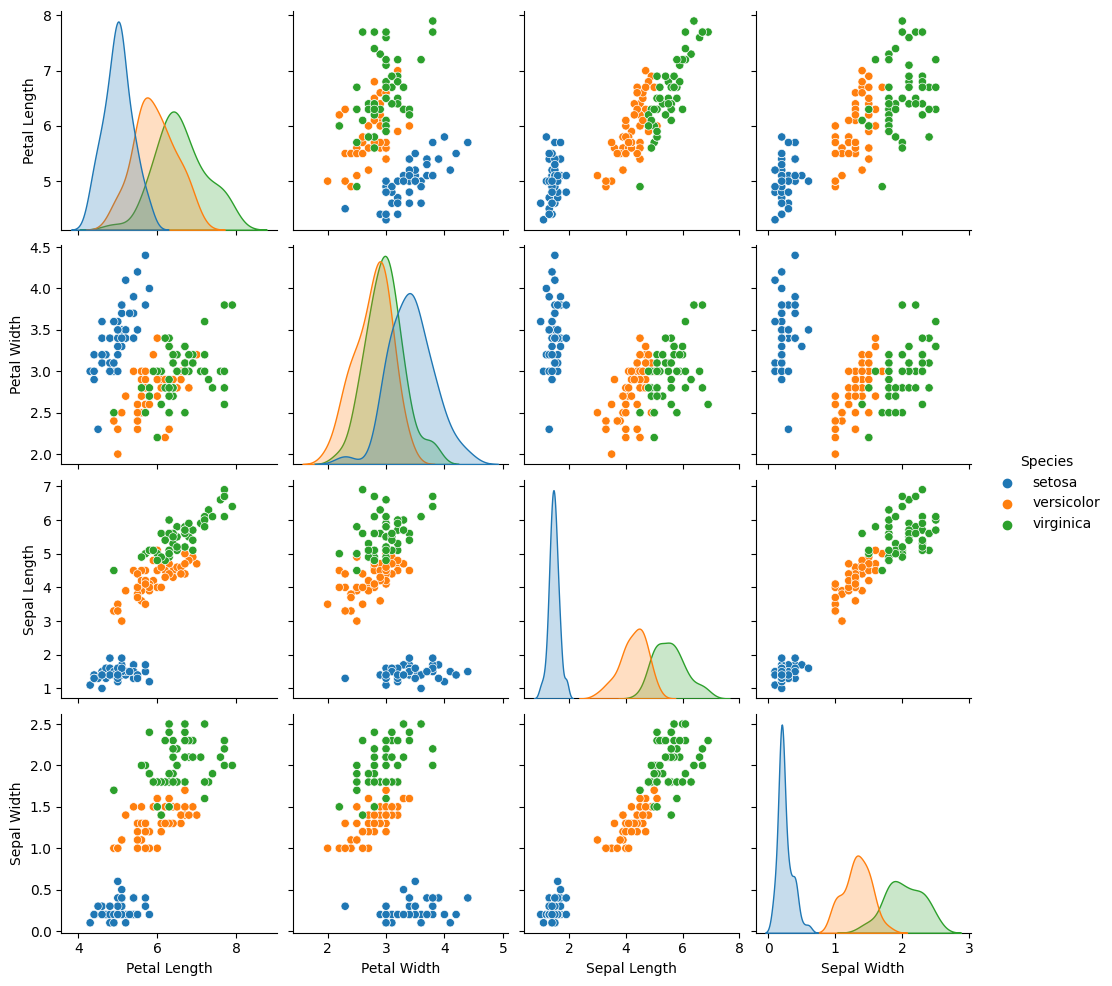

In [19]:
#specifying the hue to get the coloured visuals
plt.figure(figsize=(25,25))
sns.pairplot(df,hue='Species')
plt.show()

By looking the result of pair plot we sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.In pair plot we saw that their are some feature combination which has very less overlapping b/w Versicolor and virginica, that’s means those feature are very important for our classification task purpose

In [20]:
#check the correlation 
df.corr(method='pearson')

,Petal Length,Petal Width,Sepal Length,Sepal Width
Petal Length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


In [21]:
df.corr(method='spearman')

,Petal Length,Petal Width,Sepal Length,Sepal Width
Petal Length,1.000000,-0.166778,0.881898,0.834289
Petal Width,-0.166778,1.000000,-0.309635,-0.289032
Sepal Length,0.881898,-0.309635,1.000000,0.937667
Sepal Width,0.834289,-0.289032,0.937667,1.000000


[]

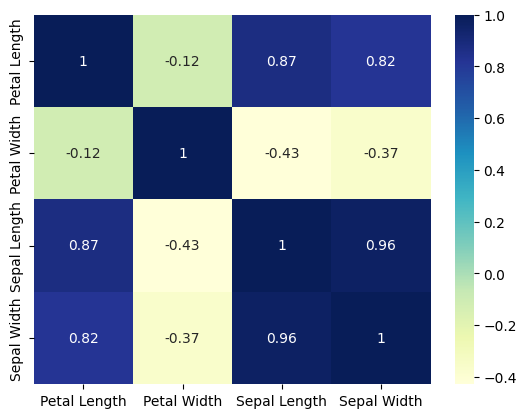

In [22]:
#correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.plot()

## STEP 3: Data Preparation

In [23]:
X=iris.data[:,:]
y=iris.target

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## STEP 4: Training the Algorithm

In [26]:
#model building 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree

In [27]:
#splitting the dataset into training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
#create the instance of decision tree classifier
classifier=DecisionTreeClassifier(criterion='gini',min_samples_split=2)

#fit the model into trainig data 
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

## STEP 5: Make Predictions

In [29]:
#make predictions on test data 
y_predict=classifier.predict(X_test)
y_predict

array([1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 0, 2])

In [30]:
#comparing the actual and predict values
comp_values=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_predict})
comp_values

,Actual_value,Predicted_value
0,1,1
1,1,1
2,2,2
3,2,2
4,2,1
5,0,0
6,2,1
7,0,0
8,1,1
9,2,2


## STEP 6: Visualizing the Model

In [31]:
!pip install pydotplus
!pip install graphviz
!pip install IPython

                                              0.0/278.7 kB ? eta -:--:--
     -----                                 41.0/278.7 kB 653.6 kB/s eta 0:00:01
     --------------                       112.6/278.7 kB 930.9 kB/s eta 0:00:01
     ---------------------                163.8/278.7 kB 893.0 kB/s eta 0:00:01
     ------------------------------         225.3/278.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 903.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=5b5d164c2607d590b2c92fe565

In [32]:
#install the required libraries 
#pip install pydotplus
#pip install graphviz
#pip install IPython
import graphviz
import pydotplus
from IPython.display import Image

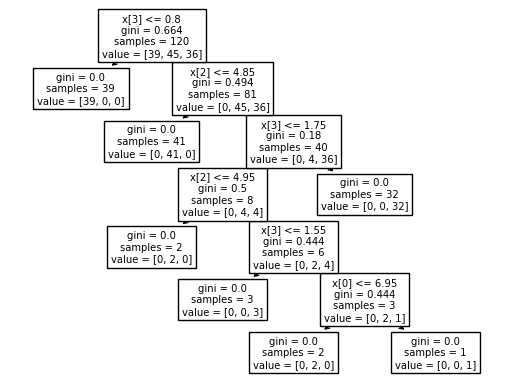

In [33]:
#visualize the tree which is formed on training data

from sklearn import tree
tree.plot_tree(classifier)
plt.rcParams['figure.figsize']=(25,25)

## STEP 7: Evaluating the Model

In [34]:
#accuracy value
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,r2_score
accuracy=accuracy_score(y_test,y_predict)
print('the value of accuracy',accuracy)

the value of accuracy 0.9


## STEP 8: Predictions for New Data

In [35]:
new_data = [[5.1, 3.5, 1.4, 0.2], [6.3, 2.8, 5.1, 1.5], [4.9, 2.9, 3.6, 1.3]]
predictions = classifier.predict(new_data)
print("Predictions for new data:")
for data_point, prediction in zip(new_data, predictions):
    print("Data:", data_point, "-> Prediction:", prediction)

Predictions for new data:
Data: [5.1, 3.5, 1.4, 0.2] -> Prediction: 0
Data: [6.3, 2.8, 5.1, 1.5] -> Prediction: 2
Data: [4.9, 2.9, 3.6, 1.3] -> Prediction: 1


## Thank You